<a href="https://colab.research.google.com/github/SarahEldreny/GTSRB---German-Traffic-Sign-Recognition-Benchmark-classification-/blob/main/Image_Processing_Project_with_Convolutional_Neural_Network!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Brief on Convolutional Neural Network**

A convolutional neural network is a class of deep learning which deals with processing image and video data by extracting features from them and build a neural network by assigning them weights and convolved them with a filter to classify and identify an image.

CNN is a prior choice of every data scientist to deal with any Image or video processing data. Using the transfer learning model and modifying it with our layers is also easy.
#**Defining Problem Statement**

Today self-driving cars are overtaking the automobile industry where drivers can fully depend on cars. To achieve high accuracy it’s important that cars should be able to understand all traffic rules. In this project, we are going to develop a traffic sign identification problem.

There are many different traffic signs like speed limit, traffic signals, indicating directions(left or right), etc. The dataset we are working on contains 50000 images of 43 classes which are numbered from 0 to 42.

You can download the dataset from here
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?resource=download.
Start Building Image Classification Project

In this project, we are going to build a complete end-to-end GUI for the Traffic Sign identification problem statement.

#**Step-1**) Explore the Dataset

Load Dataset

In [1]:
#Import all the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

Now what we will do is load all the images in a single list in form of an array that will describe the pixels of the image and another list which will contain labels of the corresponding image. To feed image data to the model we need to convert it into a NumPy array.

The training dataset contains a different folder with the name of classes named 0 to 42. with the help of the os module we will iterate through each class folder and append the image and respective label to the list. we also have CSV files that contain the actual label category name.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark

/content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark


In [4]:
#!unzip GTSRB.zip

Success. Time taken: 725.68 seconds
Processed 39209 images.


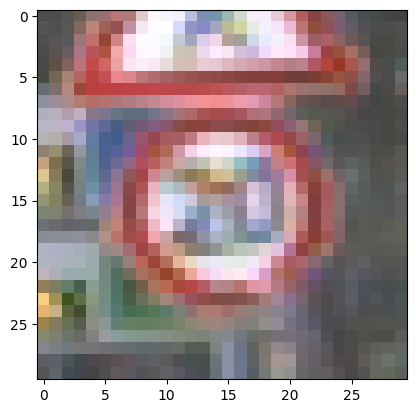

In [5]:
import os
from PIL import Image
import numpy as np
import time

# Define the path to the images directory
imgs_path = "/content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark/Train"
data = []
labels = []
classes = 43  # Total number of classes in the dataset

# Start timing
start_time = time.time()

# Loop through each class directory
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i))  # Path to the current class directory
    for img in os.listdir(img_path):
        im = Image.open(os.path.join(img_path, img))  # Open the image file
        im = im.resize((30, 30))  # Resize the image to 30x30 pixels
        im = np.array(im)  # Convert the image to a NumPy array
        data.append(im)  # Append the image data to the list
        labels.append(i)  # Append the class label to the list

# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Success. Time taken: {elapsed_time:.2f} seconds")
print(f"Processed {len(data)} images.")

# Optionally, display the first image to verify
import matplotlib.pyplot as plt

if len(data) > 0:
    plt.imshow(data[0])
    plt.show()
else:
    print("No images found.")


#**Explore sample Image**

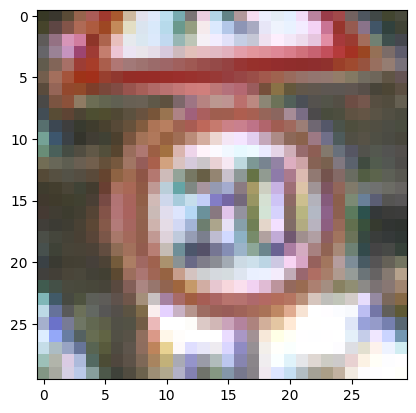

In [7]:
#let’s look at one any sample image using pillow library.

path = "/content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark/Train/0/00000_00001_00006.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img)
plt.imshow(img)
plt.show()

#**Step-2 Split Dataset into train and test**
We will use the to_categorical method to convert labels into one-hot encoding.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)



#**Step-3) Build a CNN model**
Now we will start developing a convolutional neural network to classify images for correct labels. CNN is best to work with image data.

The architecture of our CNN model

    Conv2D layer –  we will add 2 convolutional layers of 32 filters, size of 5*5, and activation as relu
    Max Pooling – MaxPool2D with 2*2 layers
    Dropout with a rate of 0.25.0
    2 Convolutional layer of 64 filters and size of 3*3
    Dropout with a rate of 0.25
     Flattenn layer to squeeze the layers into 1 dimension
    Dense, feed-forward neural network(256 nodes, activation=”relu”)
    Dropout Layer(0.5)
    Dense layer(nodes=46, activation=”softmax”)

    MaxPool2D – Maximum pooling layer is used to reduce the size of images
    Dropout – Dropout is a regularization technique to reduce overfitting
    Flatten – to convert the parrel layers to squeeze the layers
    Dense –  for feed-forward neural network
    the last layer will have an activation function as softmax for Multi-class classification.


In [9]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

#**Step-4) Train and Validate the Model**

let’s first compile the model. during compiling we need to describe the loss function and optimizer to use.



In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



    Loss Function – to calculate the loss done by model. we will use categorical cross-entropy as we have a multiclass classification problem statement
    Optimizer – Optimize to optimize the loss function

Let’s fit the train and test data to model and start training the convolutional model. we need to define a number of epochs to train for and batch size to consider while training the model.

In [11]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 164s 330ms/step - loss: 2.5232 - accuracy: 0.3912 - val_loss: 0.9803 - val_accuracy: 0.7920
Epoch 2/15
491/491 [==============================] - 142s 290ms/step - loss: 1.1031 - accuracy: 0.6871 - val_loss: 0.5304 - val_accuracy: 0.8579
Epoch 3/15
491/491 [==============================] - 131s 268ms/step - loss: 0.7845 - accuracy: 0.7735 - val_loss: 0.3692 - val_accuracy: 0.9047
Epoch 4/15
491/491 [==============================] - 127s 259ms/step - loss: 0.6542 - accuracy: 0.8037 - val_loss: 0.2452 - val_accuracy: 0.9322
Epoch 5/15
491/491 [==============================] - 132s 269ms/step - loss: 0.5394 - accuracy: 0.8387 - val_loss: 0.2404 - val_accuracy: 0.9272
Epoch 6/15
491/491 [==============================] - 128s 262ms/step - loss: 0.4675 - accuracy: 0.8610 - val_loss: 0.1667 - val_accuracy: 0.9572
Epoch 7/15
491/491 [==============================] - 130s 264ms/step - loss: 0.3440 - accuracy: 0.8968 - val_loss: 0.1130 -


It will take some time to run so please keep patience till it runs.

Our model received an accuracy of 95% on training data. Now let us plot an accuracy and loss graph using Matplotlib.

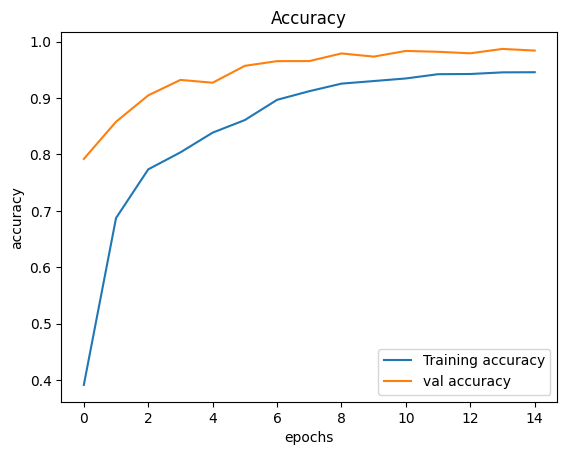

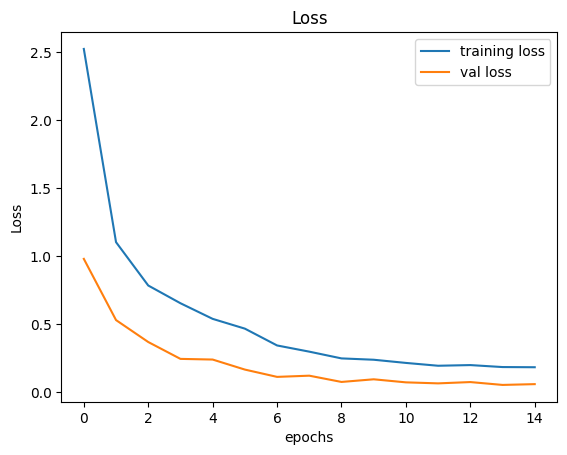

In [12]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

accuracy

Image classification | loss

Our model is performing descent well and gives very well performance, We can see the increasing accuracy and decreasing loss on the graph.
#**Step-5) Test the Model**

The dataset contains a test folder that has different test images and a test.csv file that contains details related to the image path and respective labels. Again we will load the data using pandas and resize it to the shape of 30*30 pixels and convert it to a NumPy array. After processing test images we will check the accuracy of the model against actual labels.

In [25]:
# from sklearn.metrics import accuracy_score
# test = pd.read_csv("gtsrb-german-traffic-sign/Test.csv")
# test_labels = test['ClassId'].values
# test_img_path = "../input/gtsrb-german-traffic-sign"
# test_imgs = test['Path'].values
# test_data = []
# test_labels = []
# for img in test_imgs:
#     im = Image.open(test_img_path + '/' + img)
#     im = im.resize((30,30))
#     im = np.array(im)
#     test_data.append(im)
# test_data = np.array(test_data)
# predictions = model.predict_classes(test_data)
# print("accuracy: ", accuracy_score(test_labels, predictions))

In [18]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score

# Read the test CSV file
test = pd.read_csv("/content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark/Test.csv")

# Extract test labels from the CSV
test_labels = test['ClassId'].values

# Define the path to the test images directory
test_img_path = "/content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark"

# Extract test image paths from the CSV
test_imgs = test['Path'].values

# Initialize lists to store test data and predictions
test_data = []

# Loop through each test image
for img in test_imgs:
    # Open and resize the image
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30, 30))
    im = np.array(im)
    test_data.append(im)

# Convert the test data list to a NumPy array
test_data = np.array(test_data)

# Normalize the test data
test_data = test_data / 255.0

# Predict classes for the test data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_classes)
print("Accuracy:", accuracy)


395/395 [==============================] - 15s 38ms/step
Accuracy: 0.08741092636579573


#**Step-6) Save the Model**

Save the model for future use as well, we will use the dump model to create a GUI for Traffic Classification Project.

In [19]:
model.save('traffic_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Hence we have successfully built and evaluated our Convolutional neural network for the image classification task. Now we will work on the frontend part and deploy our model on GUI using the python Tkinter library.
#**Build Traffic Classification GUI**

let’s start developing GUI using the python Tkinter library. first, we will load the deployed model then we will define class names in the dictionary. And then we will create one by one function to upload and classify images.

In [24]:
# from tkinter import filedialog
# from tkinter import *
# import tkinter as tk
# from PIL import ImageTk, Image
# from keras.models import load_model
# import numpy as np
# #load the trained model to classify traffic signs
# model = load_model('traffic_classifier.h5')
# #dictionary to label all traffic signs class.
# classes = { 1:'Speed limit (20km/h)',
#             2:'Speed limit (30km/h)',
#             3:'Speed limit (50km/h)',
#             4:'Speed limit (60km/h)',
#             5:'Speed limit (70km/h)',
#             6:'Speed limit (80km/h)',
#             7:'End of speed limit (80km/h)',
#             8:'Speed limit (100km/h)',
#             9:'Speed limit (120km/h)',
#             10:'No passing',
#             11:'No passing veh over 3.5 tons',
#             12:'Right-of-way at intersection',
#             13:'Priority road',
#             14:'Yield',
#             15:'Stop',
#             16:'No vehicles',
#             17:'Veh > 3.5 tons prohibited',
#             18:'No entry',
#             19:'General caution',
#             20:'Dangerous curve left',
#             21:'Dangerous curve right',
#             22:'Double curve',
#             23:'Bumpy road',
#             24:'Slippery road',
#             25:'Road narrows on the right',
#             26:'Road work',
#             27:'Traffic signals',
#             28:'Pedestrians',
#             29:'Children crossing',
#             30:'Bicycles crossing',
#             31:'Beware of ice/snow',
#             32:'Wild animals crossing',
#             33:'End speed + passing limits',
#             34:'Turn right ahead',
#             35:'Turn left ahead',
#             36:'Ahead only',
#             37:'Go straight or right',
#             38:'Go straight or left',
#             39:'Keep right',
#             40:'Keep left',
#             41:'Roundabout mandatory',
#             42:'End of no passing',
#             43:'End no passing veh > 3.5 tons' }
# #initialize GUI
# top=tk.Tk()
# top.geometry('800x600')
# top.title('Traffic sign classification')
# top.configure(background='#CDCDCD')
# label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
# sign_image = Label(top)
# def classify(file_path):
#     global label_packed
#     image = Image.open(file_path)
#     image = image.resize((30,30))
#     image = numpy.expand_dims(image, axis=0)
#     image = numpy.array(image)
#     pred = model.predict_classes([image])[0]
#     sign = classes[pred+1]
#     print(sign)
#     label.configure(foreground='#011638', text=sign)
# def show_classify_button(file_path):
#     classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
#     classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
#     classify_b.place(relx=0.79,rely=0.46)
# def upload_image():
#     try:
#         file_path=filedialog.askopenfilename()
#         uploaded=Image.open(file_path)
#         uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
#         im=ImageTk.PhotoImage(uploaded)
#         sign_image.configure(image=im)
#         sign_image.image=im
#         label.configure(text='')
#         show_classify_button(file_path)
#     except:
#         pass
# upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
# upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
# upload.pack(side=BOTTOM,pady=50)
# sign_image.pack(side=BOTTOM,expand=True)
# label.pack(side=BOTTOM,expand=True)
# heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
# heading.configure(background='#CDCDCD',foreground='#364156')
# heading.pack()
# top.mainloop()

# Replacing with Streamlit:

To replace Tkinter with Streamlit, you would need to rewrite the GUI part of the code using Streamlit syntax and deploy it on a Streamlit server. Streamlit simplifies the process of building interactive web applications in Python. Here's how you can rewrite the code using Streamlit:

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00


In [23]:
import streamlit as st
from PIL import Image
from keras.models import load_model
import numpy as np

# Load the pre-trained model
model = load_model('traffic_classifier.h5')

# Define traffic sign classes
classes = {
    1: 'Speed limit (20km/h)',
    2: 'Speed limit (30km/h)',
    # Add other classes...
}

# Page layout
st.title('Traffic Sign Classification')
st.sidebar.title('Upload Image')
uploaded_file = st.sidebar.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# Image classification
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write('')
    st.write('Classifying...')

    # Preprocess image
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)

    # Predict class
    pred = model.predict_classes(image)[0]
    sign = classes.get(pred + 1, 'Unknown')
    st.write(f'Predicted Traffic Sign: {sign}')


2024-05-17 15:58:10.495 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


here the first user will get an upload button, as he/she uploads as image classify button will be visible. when the user will trigger classify button classify function will be called along with a file path where we first process the image and feed it to the model to predict its respective class and whatever class in between 0-42 predicted by the model we access its categorical name from classes dictionary and display it on screen.